## Simple Example using Create from Regions

To take advantage of the ability of triangular meshes to match complex geometries, we need to be able to create a domain with a complicated boundary. As such in this notebook we investigate the use of the procedure `create_domain_from_regions`. We then set up the initial conditions, the boundary conditions and the method for evolving the solution.

### Setup Notebook for Visualisation and Animation

We are using the format of a jupyter notebook. As such we need to setup inline matplotlib plotting and animation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Allow inline jshtml animations
from matplotlib import rc
rc('animation', html='jshtml')

### Import ANUGA

We assume that anuga has been installed. If so we can import anuga. 

In [2]:
import anuga

### Create an ANUGA domain with create_domain_from_regions 

ANUGA is based on triangles and so the mesh can conform to interesting geometrical structures. In our example the steps define an interesting geometry. Let's conform our mesh to the steps.

We will use the construction function `anuga.create_domain_from_regions`. This function needs at least a polygon which defines the boundary of the region, and a tagging of the sections of the boundry polygon, which will allow us to specify specific boundary conditions associated with the tagged sections of the boundary.

In our previous example the function `rectangular_cross_domain` created a mesh with 4 tagged boundary sections, corresponding to the tags `left`, `right`, `top` and `bottom`.

We wil do the same, but this time using the function `anuga.create_domain_from_regions`.

Figure files for each frame will be stored in _plot


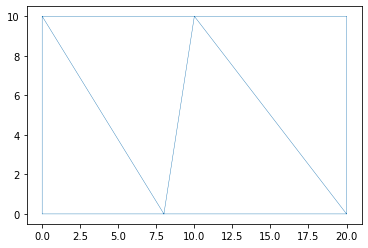

In [3]:
bounding_polygon = [[0.0, 0.0],
                    [20.0, 0.0],
                    [20.0, 10.0],
                    [0.0, 10.0]]

boundary_tags={'bottom': [0],
                'right': [1],
                'top': [2],
                'left': [3]}


domain2 = anuga.create_domain_from_regions(bounding_polygon, boundary_tags)

# Plot the resulting mesh
dplotter2 = anuga.Domain_plotter(domain2)  
plt.triplot(dplotter2.triang, linewidth = 0.4);

### Mesh size

Obviously the mesh is too coarse. We can force the mesh size to be smaller by using the argument maximum_triangle_size.

Figure files for each frame will be stored in _plot


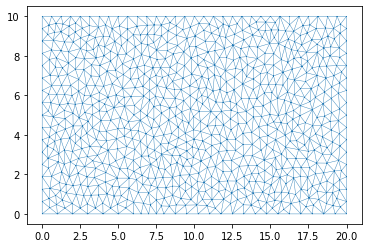

In [4]:
domain2 = anuga.create_domain_from_regions(bounding_polygon,
                               boundary_tags, 
                               maximum_triangle_area = 0.2,
                               )

# Plot the resulting mesh
dplotter2 = anuga.Domain_plotter(domain2)  
plt.triplot(dplotter2.triang, linewidth = 0.4);

### More Complicated Boundary

In the first example we created the steps using a discontinuous elevation. We can mimic that behaviour by explicitly cutting out the triangles associated with the steps. This leads to a more complicated boundary polygon. 

Note that we need to be careful about associating boundary polygon sections with the approriate tagged boundary.

We now have 7 tagged bounday regions. These 7 regions will need to be associated with appropriate boundary conditions. 

Figure files for each frame will be stored in _plot


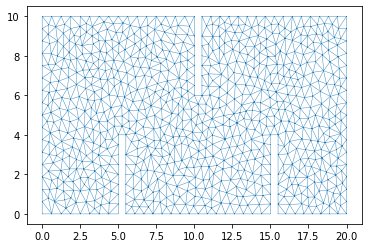

In [5]:
bounding_polygon = [[0.0, 0.0],
                    [5.0, 0.0], [5.0, 4.0], [5.5, 4.0], [5.5, 0.0],
                    [15.0, 0.0], [15.0, 4.0], [15.5, 4.0], [15.5, 0.0],
                    [20.0, 0.0],
                    [20.0, 10.0],
                    [10.5, 10.0], [10.5, 6.0], [10, 6.0], [10, 10.0],
                    [0.0, 10.0]]

boundary_tags={'bottom': [0,4,8],
               'right': [9],
               'top': [10,14],
               'left': [15],
               'wall1': [1,2,3],
               'wall2': [5,6,7],
               'wall3': [11,12,13]
              }


domain2 = anuga.create_domain_from_regions(bounding_polygon, 
                                           boundary_tags,
                                           maximum_triangle_area = 0.2,)

domain2.set_name('domain2')
domain2.set_store_vertices_smoothly(False)

# Plot the resulting mesh
dplotter2 = anuga.Domain_plotter(domain2)  
plt.triplot(dplotter2.triang, linewidth = 0.4);

### Initial Conditions and Boundary Conditions

As before we setup the inital values for our elevation, friction and stage. And associated Dirichlet BC on the left and right boundary regions and reflective everywhere else. 

Notice that in this case the definition of `elevation` is very simple.

In [6]:
#Initial Conditions
domain2.set_quantity('elevation', lambda x,y : -x/10, location='centroids')  # Use function for elevation
domain2.set_quantity('friction', 0.01, location='centroids')                # Constant friction 
domain2.set_quantity('stage', expression='elevation', location='centroids') # Dry Bed 

# Boundary Conditions
Bi = anuga.Dirichlet_boundary([0.4, 0, 0])         # Inflow
Bo = anuga.Dirichlet_boundary([-2, 0, 0])          # Inflow
Br = anuga.Reflective_boundary(domain2)            # Solid reflective wall

domain2.set_boundary({'left': Bi, 'right': Bo, 'top': Br, 'bottom': Br, 'wall1': Br, 'wall2': Br, 'wall3': Br})

### Evolve

Now we can evolve. With this implementation the step walls are infinitely high and so we will not get a flow over the top of 2nd lower step.

In [7]:
for t in domain2.evolve(yieldstep=2, duration=40):
  
    #dplotter.plot_depth_frame()
    dplotter2.save_depth_frame(vmin=0.0, vmax=1.0)
    
    domain2.print_timestepping_statistics()

    
# Read in the png files stored during the evolve loop
dplotter2.make_depth_animation() 

Time = 0.0000 (sec), steps=0 (7s)
Time = 2.0000 (sec), delta t in [0.01905513, 0.04796679] (s), steps=87 (0s)
Time = 4.0000 (sec), delta t in [0.01744624, 0.01945916] (s), steps=109 (0s)
Time = 6.0000 (sec), delta t in [0.01382385, 0.01743857] (s), steps=134 (0s)
Time = 8.0000 (sec), delta t in [0.01615668, 0.01741694] (s), steps=121 (0s)
Time = 10.0000 (sec), delta t in [0.01595034, 0.01723757] (s), steps=123 (0s)
Time = 12.0000 (sec), delta t in [0.01510446, 0.01647925] (s), steps=128 (0s)
Time = 14.0000 (sec), delta t in [0.01386254, 0.01509676] (s), steps=137 (0s)
Time = 16.0000 (sec), delta t in [0.01301787, 0.01385327] (s), steps=151 (0s)
Time = 18.0000 (sec), delta t in [0.01246696, 0.01301680] (s), steps=158 (0s)
Time = 20.0000 (sec), delta t in [0.01228814, 0.01246448] (s), steps=162 (0s)
Time = 22.0000 (sec), delta t in [0.01209191, 0.01229133] (s), steps=165 (0s)
Time = 24.0000 (sec), delta t in [0.01206389, 0.01210745] (s), steps=166 (0s)
Time = 26.0000 (sec), delta t in [0